The following project is about the analysis of a dataset contaning data about google play store in order to find interesting insights and predict the app rating based on some app features.<br>
The project can be divided in the following sections:<br>
-Dataset cleaning + Feature Engineering<br>
-Exploratory Data Analysis<br>
-Data preparation for ML (encoding, scaling) for Rating prediction<br>
-ML modeling<br>
-Results<br>

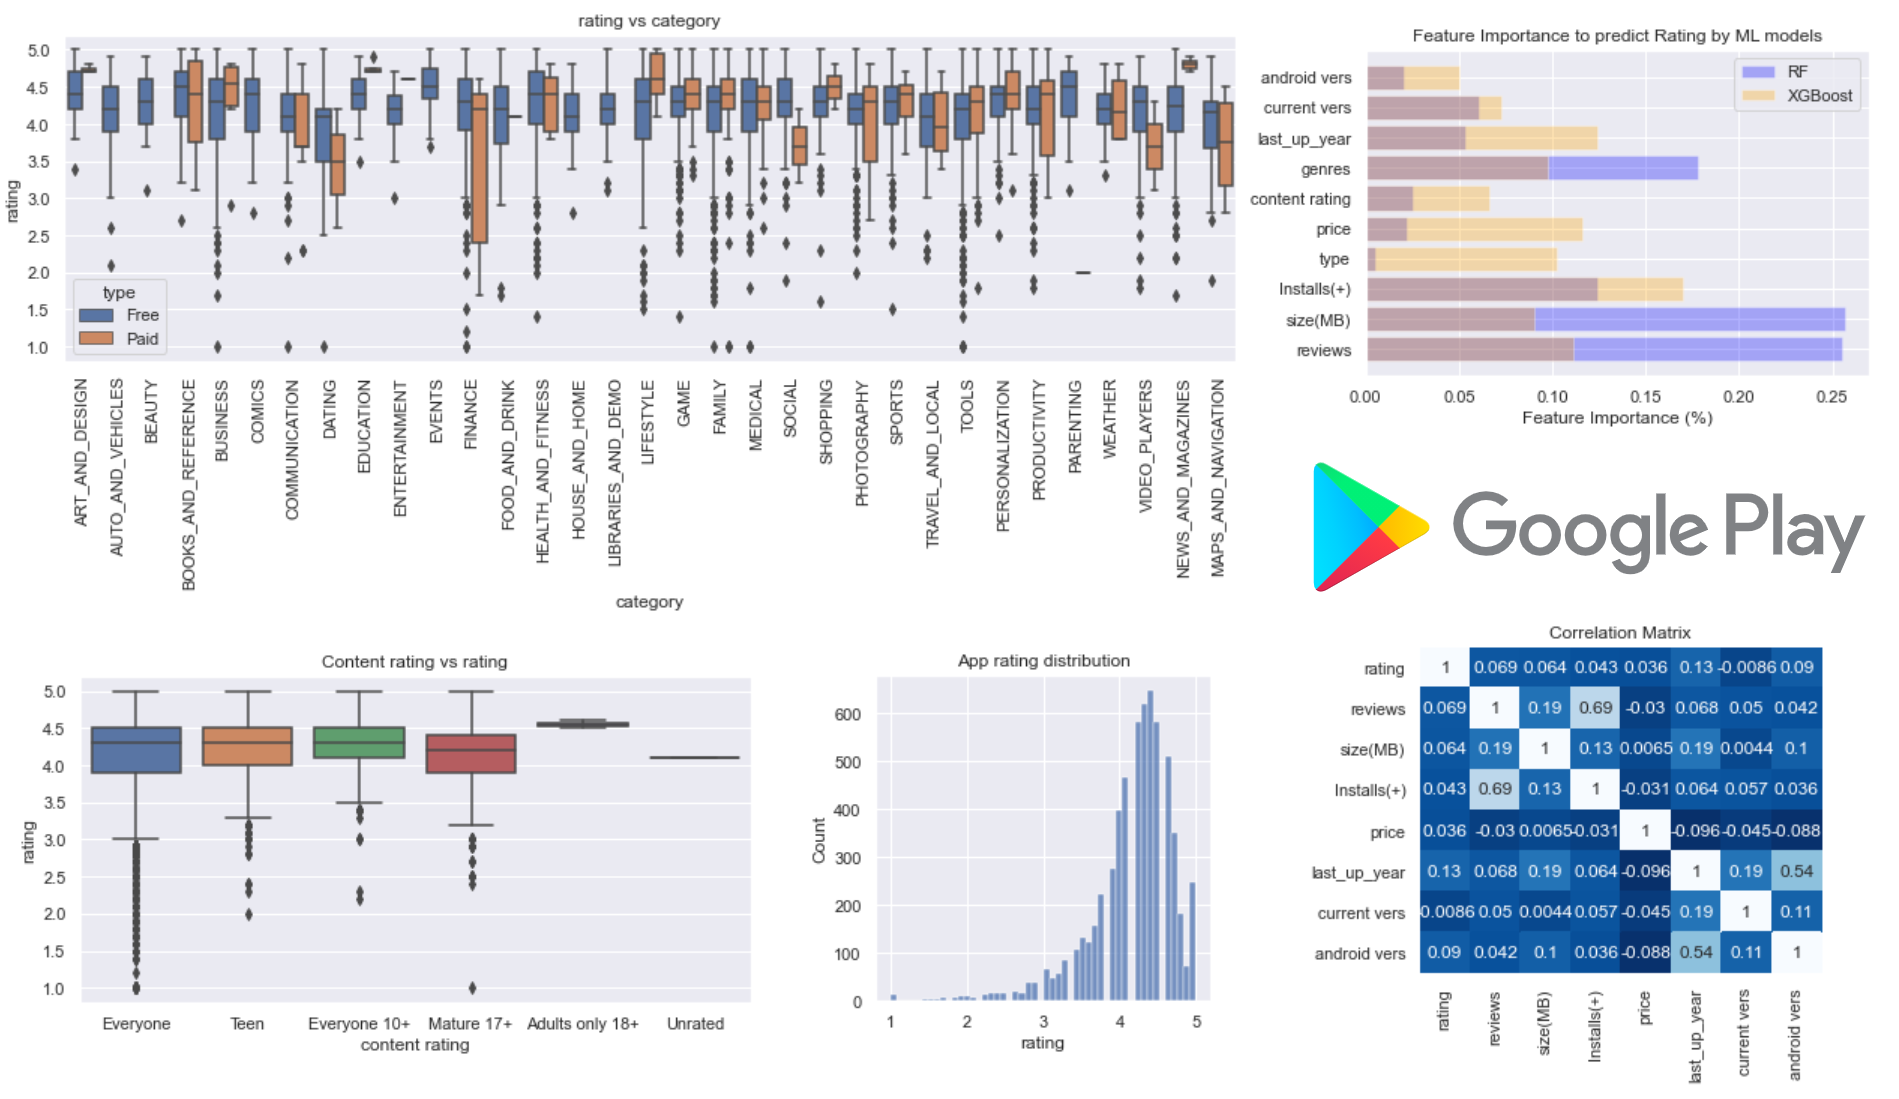

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.express as px

In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


In [156]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can already notice that some columns that should be 'Numerical' are labeled as objects (strings).<br>
We will work on this and convert these columns into numerical.

# Data Cleaning

First, some basic cleaning will be performed, then every feature will be analyzed.

First, we will change the columns names to lower case

In [158]:
df = df.rename(columns=str.lower)

In [159]:
df.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content rating', 'genres', 'last updated', 'current ver',
       'android ver'],
      dtype='object')

Are there duplicate values?

In [160]:
df[df.duplicated(subset='app')]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


There are 1181 duplicated apps apparently. They will be dropped.

In [161]:
df.drop_duplicates(subset='app', inplace=True, ignore_index=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9660 non-null   object 
 1   category        9660 non-null   object 
 2   rating          8197 non-null   float64
 3   reviews         9660 non-null   object 
 4   size            9660 non-null   object 
 5   installs        9660 non-null   object 
 6   type            9659 non-null   object 
 7   price           9660 non-null   object 
 8   content rating  9659 non-null   object 
 9   genres          9660 non-null   object 
 10  last updated    9660 non-null   object 
 11  current ver     9652 non-null   object 
 12  android ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [163]:
df_clean = df.copy()

## Reviews column:

Are all the reviews actually numbers?

In [164]:
print('Number of non numeric reviews :', len(df) - df.reviews.str.isnumeric().sum())

Number of non numeric reviews : 1


It looks like there is a not numeric review, which is it?

In [165]:
df[pd.to_numeric(df.reviews, errors='coerce').isna()]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This data looks a bit weird, all the columns have apperently wrong entries. It can be corrected as follows:

In [166]:
df.at[9300,'category'] = np.nan
df.at[9300,'rating'] = 1.9
df.at[9300,'reviews'] = 19.0
df.at[9300,'size'] = '3.0M'
df.at[9300,'installs'] = '1,000+'
df.at[9300,'type'] = 'Free'
df.at[9300,'price'] = 0
df.at[9300,'content rating'] = 'Everyone'
df.at[9300,'genres'] = np.nan
df.at[9300,'last updated'] = 'February 11, 2018'
df.at[9300,'current ver'] = '1.0.19'
df.at[9300,'android ver'] = '4.0 and up'


However, category is still missing and in th dataframe there are over 9000+ apps. For this reason, we will drop this row.

In [167]:
df = df.drop(9300)
df = df.reset_index(drop=True)

In [168]:
print('Number of non numeric reviews :', len(df) - df.reviews.str.isnumeric().sum())

Number of non numeric reviews : 0


Now the review column will be converted into int64 data type

In [169]:
df['reviews'] = df['reviews'].astype('int64')

## App size analysis

In [170]:
df['size']

0                      19M
1                      14M
2                     8.7M
3                      25M
4                     2.8M
               ...        
9654                   53M
9655                  3.6M
9656                  9.5M
9657    Varies with device
9658                   19M
Name: size, Length: 9659, dtype: object

We can see that different apps sizes have 'M' which stands for MB (Megabytes).<br>
Moreover, there is also a size 'Varies with device', we will now investigate if there are other non numerical sizes.

In [171]:
df[~df['size'].str.contains('M', regex= True, na=False)].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device


We can see that different entries have 'Varies with device' as size. Moreover, some apps have a size in KB (labeled as 'k').

We will now check if there are other strings or characters besides k, M and 'Varies with device'.

In [172]:
df[~df['size'].str.contains('[k,M,Varies with device]$', regex= True, na=False)].head()

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver


OK, the sizes are either in KB (k), MB(M) or Varies with device

First, we will label the the size values that corresponds to Varies with device with 'NaN'

In [173]:
df['size'] = df['size'].replace('Varies with device', 'NaN', regex=True)

In [174]:
df['size']

0        19M
1        14M
2       8.7M
3        25M
4       2.8M
        ... 
9654     53M
9655    3.6M
9656    9.5M
9657     NaN
9658     19M
Name: size, Length: 9659, dtype: object

Now, we will convert the sizes to KB and MB.

In [175]:
size =[]

for i in df['size']:
    if i == 'NaN':
        size.append('NaN')
    elif i[-1] == 'k':
        size.append(float(i[:-1])/1000)
    else:
        size.append(float(i[:-1]))

In [176]:
df['size'] = size
df['size'] = df['size'].astype(float)
df.rename(columns={df.columns[4]:'size(MB)'}, inplace=True)

In [177]:
df.head()

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9659 non-null   object 
 1   category        9659 non-null   object 
 2   rating          8196 non-null   float64
 3   reviews         9659 non-null   int64  
 4   size(MB)        8432 non-null   float64
 5   installs        9659 non-null   object 
 6   type            9658 non-null   object 
 7   price           9659 non-null   object 
 8   content rating  9659 non-null   object 
 9   genres          9659 non-null   object 
 10  last updated    9659 non-null   object 
 11  current ver     9651 non-null   object 
 12  android ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


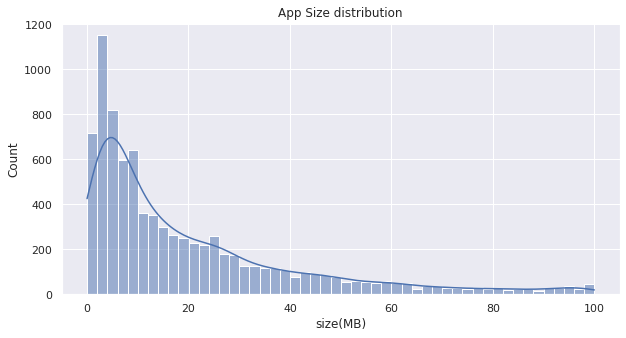

In [179]:
plt.subplots(figsize=(10,5))
sns.histplot(x='size(MB)', data=df, kde=True, bins=50);
plt.title('App Size distribution');

The distribution of app size is right skewed.<br>
Mean, Median and Mode can be computed as follows:

In [180]:
print('Average app size is: ', df['size(MB)'].mean())
print('Median app size is: ', df['size(MB)'].median())
print('Mode app size is: ', df['size(MB)'].mode()[0])

Average app size is:  20.39528931451608
Median app size is:  12.0
Mode app size is:  11.0


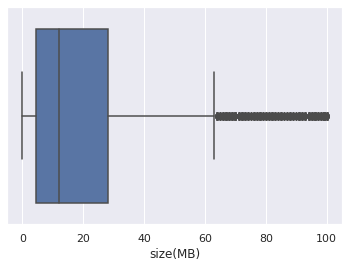

In [181]:
sns.boxplot(x='size(MB)', data=df);

Also from the boxplot we can see that the distribution is right skewed.

## App Rating analysis

Text(0.5, 1.0, 'App rating distribution')

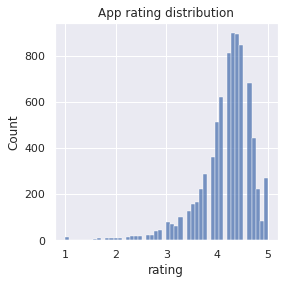

In [182]:
plt.figure(figsize=(4,4))
sns.histplot(x='rating', data=df, bins=50)
plt.title('App rating distribution')

In [183]:
print('Average app rating is: ', df['rating'].mean())
print('Median app rating is: ', df['rating'].median())
print('Mode app rating is: ', df['rating'].mode()[0])

Average app rating is:  4.173243045387998
Median app rating is:  4.3
Mode app rating is:  4.3


<AxesSubplot:xlabel='rating'>

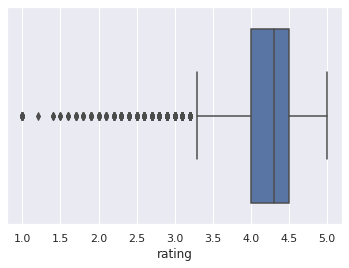

In [184]:
sns.boxplot(x='rating', data=df)

How many apps with 1 star rating?

In [185]:
len(df[df['rating'] <= 1.0])

16

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9659 non-null   object 
 1   category        9659 non-null   object 
 2   rating          8196 non-null   float64
 3   reviews         9659 non-null   int64  
 4   size(MB)        8432 non-null   float64
 5   installs        9659 non-null   object 
 6   type            9658 non-null   object 
 7   price           9659 non-null   object 
 8   content rating  9659 non-null   object 
 9   genres          9659 non-null   object 
 10  last updated    9659 non-null   object 
 11  current ver     9651 non-null   object 
 12  android ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


We will consider these values as outliers and drop them.

In [187]:
df = df.loc[df['rating']!=1.0]

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9643 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9643 non-null   object 
 1   category        9643 non-null   object 
 2   rating          8180 non-null   float64
 3   reviews         9643 non-null   int64  
 4   size(MB)        8416 non-null   float64
 5   installs        9643 non-null   object 
 6   type            9642 non-null   object 
 7   price           9643 non-null   object 
 8   content rating  9643 non-null   object 
 9   genres          9643 non-null   object 
 10  last updated    9643 non-null   object 
 11  current ver     9635 non-null   object 
 12  android ver     9641 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


We can see that still there are 9643-8180=1463 missing values for rating.

## App price analysis

In [189]:
df['price'].isnull().sum()

0

There are no missing values in the price column

In [190]:
df['price'] = df['price'].str.replace('$','').astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [191]:
df['price'].value_counts()

0.00      8889
0.99       145
2.99       123
1.99        73
4.99        70
          ... 
18.99        1
389.99       1
19.90        1
1.75         1
1.04         1
Name: price, Length: 92, dtype: int64

We can see that most of the apps are free!<br>

In [192]:
print('Free apps are {}% of the total apps in the dataset'.format(np.round(len(df[df['price']==0])*100/len(df)),2))

Free apps are 92.0% of the total apps in the dataset


<AxesSubplot:xlabel='price', ylabel='Density'>

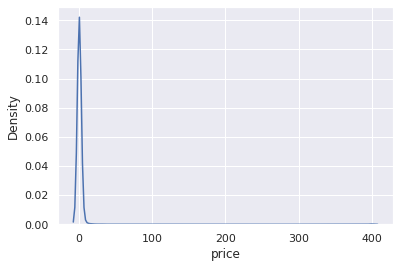

In [193]:
sns.kdeplot(x='price', data=df)

We can confirm the great majority of free apps in the store.

Text(0.5, 1.0, 'Distribution of app prices between 0-10$')

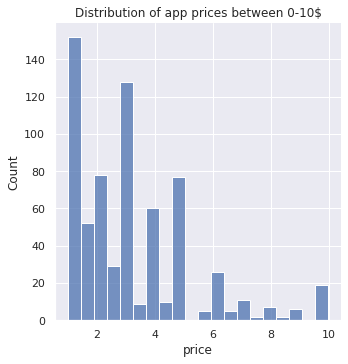

In [194]:
sns.displot(x='price', data=df[(df['price']>0) & (df['price']<10)], bins=20)
plt.title('Distribution of app prices between 0-10$')

Text(0.5, 1.0, 'Distribution of app prices higher than 10$')

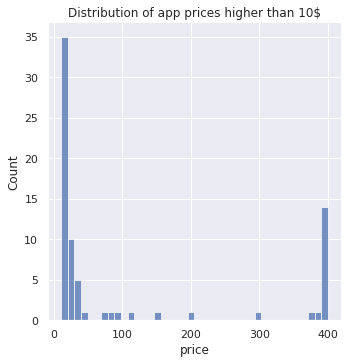

In [195]:
sns.displot(x='price', data=df[(df['price']>10)], bins=40)
plt.title('Distribution of app prices higher than 10$')

There are some apps with a price close to 400$, let's investigate more.

In [196]:
df[df['price']>350]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
3327,most expensive app (H),FAMILY,4.3,6,1.500,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3465,💎 I'm rich,LIFESTYLE,3.8,718,26.000,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4396,I am rich,LIFESTYLE,3.8,3547,1.800,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4398,I am Rich Plus,FAMILY,4.0,856,8.700,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4400,I Am Rich Premium,FINANCE,4.1,1867,4.700,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4401,I am extremely Rich,LIFESTYLE,2.9,41,2.900,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
4402,I am Rich!,FINANCE,3.8,93,22.000,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4403,I am rich(premium),FINANCE,3.5,472,0.965,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
4406,I Am Rich Pro,FAMILY,4.4,201,2.700,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


It looks like these apps are just for ''fun''.

What about the other apps which cost more than 90$ but less than 350$?

In [197]:
df[(df['price']>90) & (df['price']<350)]

,app,category,rating,reviews,size(MB),installs,type,price,content rating,genres,last updated,current ver,android ver
4399,I am rich VIP,LIFESTYLE,3.8,411,2.6,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5599,BP Fitness Lead Scanner,EVENTS,NaN,0,6.7,1+,Paid,109.99,Everyone,Events,"August 23, 2017",0.0.1,4.1 and up
5661,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0+,Paid,154.99,Everyone,Productivity,"November 24, 2017",1.0.0,4.1 and up
8577,EP Cook Book,MEDICAL,NaN,0,3.2,0+,Paid,200.00,Everyone,Medical,"July 26, 2015",1.0,3.0 and up


Among these apps, there is still one meme app 'I am rich VIP', while the others looks to be 'serious apps'. However, these apps do not have any reviews or rating.

What is the distribution of the paid apps?

<AxesSubplot:xlabel='price', ylabel='Count'>

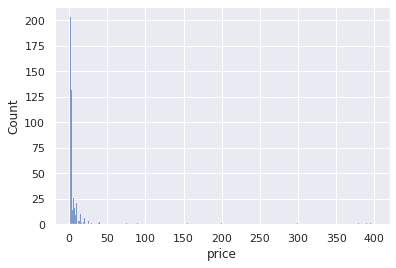

In [198]:
sns.histplot(x='price', data=df.loc[df['price'] > 0])

The distribution of the paid apps is still heavily right skewed. We will perform some cleaning by removing apps with a price higher than 50

<AxesSubplot:xlabel='price'>

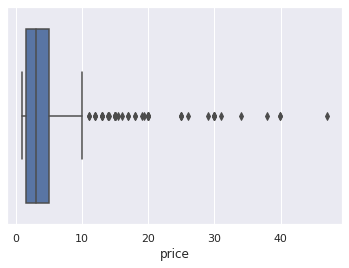

In [199]:
sns.boxplot(x='price', data=df.loc[(df['price'] < 50) &(df['price'] > 0)])

We still have a right skewed distribution, but we can see the median and the IQR now!

We will create a new dataframe 'df_clean' to host a further cleaned version of the dataframe

In [200]:
df_clean = df.loc[df['price']<20]

In [201]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9604 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9604 non-null   object 
 1   category        9604 non-null   object 
 2   rating          8155 non-null   float64
 3   reviews         9604 non-null   int64  
 4   size(MB)        8377 non-null   float64
 5   installs        9604 non-null   object 
 6   type            9603 non-null   object 
 7   price           9604 non-null   float64
 8   content rating  9604 non-null   object 
 9   genres          9604 non-null   object 
 10  last updated    9604 non-null   object 
 11  current ver     9596 non-null   object 
 12  android ver     9602 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


## App install

In [202]:
df['installs']

0           10,000+
1          500,000+
2        5,000,000+
3       50,000,000+
4          100,000+
           ...     
9654         5,000+
9655           100+
9656         1,000+
9657         1,000+
9658    10,000,000+
Name: installs, Length: 9643, dtype: object

In [203]:
df['installs'] = df['installs'].str.replace('+','').str.replace(',','').astype(float)
df_clean['installs'] = df_clean['installs'].str.replace('+','').str.replace(',','').astype(float)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
df.rename(columns={df.columns[5]:'Installs(+)'}, inplace=True)
df_clean.rename(columns={df_clean.columns[5]:'Installs(+)'}, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Most of the apps installs are relative small compared to the maximum, which is around 1e9.

### Which are the apps with these high numbers of installs?

In [205]:
df[df['Installs(+)']> 0.8e9 ]

,app,category,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last updated,current ver,android ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
302,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
304,Gmail,COMMUNICATION,4.3,4604324,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
305,Hangouts,COMMUNICATION,4.0,3419249,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
349,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
701,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device
1356,Subway Surfers,GAME,4.5,27722264,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2002,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


The apps with most installs are famous social network apps like Facebook, Instagram and Google apps.

<AxesSubplot:xlabel='Installs(+)'>

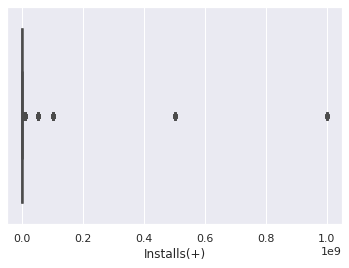

In [206]:
sns.boxplot(x='Installs(+)', data=df)

It is becoming difficult to visualize the box fences! We'll define a function to obtain them

In [207]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    print('Lower Fence:', l)
    print('Higher Fence:', u)
    return [u,l]

In [208]:
iqr_fence(df['Installs(+)'])

Lower Fence: 0.0
Higher Fence: 1000000.0


[1000000.0, 0.0]

<AxesSubplot:xlabel='Installs(+)'>

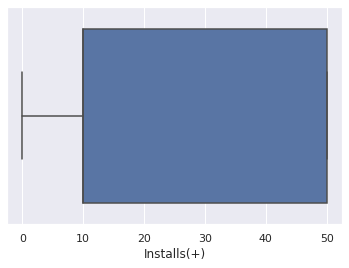

In [209]:
sns.boxplot(x='Installs(+)', data=df[df['Installs(+)']<100.0])

In [210]:
print('Total apps', len(df))
print('Number of apps with less than 1e9 installs:', len(df.loc[df['Installs(+)']<1e9]))
print('Number of apps with less than 1e8 installs:', len(df.loc[df['Installs(+)']<1e8]))
print('Number of apps with less than 1e7 installs:', len(df.loc[df['Installs(+)']<1e7]))
print('Number of apps with less than 1e6 installs:', len(df.loc[df['Installs(+)']<1e6]))
print('Number of apps with less than 1e5 installs:', len(df.loc[df['Installs(+)']<1e5]))
print('Number of apps with less than 1e4 installs:', len(df.loc[df['Installs(+)']<1e4]))
print('Number of apps with less than 1e3 installs:', len(df.loc[df['Installs(+)']<1e3]))
print('Number of apps with less than 1e2 installs:', len(df.loc[df['Installs(+)']<1e2]))

Total apps 9643
Number of apps with less than 1e9 installs: 9623
Number of apps with less than 1e8 installs: 9411
Number of apps with less than 1e7 installs: 8272
Number of apps with less than 1e6 installs: 6248
Number of apps with less than 1e5 installs: 4631
Number of apps with less than 1e4 installs: 3131
Number of apps with less than 1e3 installs: 1778
Number of apps with less than 1e2 installs: 748


# Categorical features analysis

## Category analysis

In [211]:
print('In total there are {} different app categories'. format(len(df['category'].value_counts())))

In total there are 33 different app categories


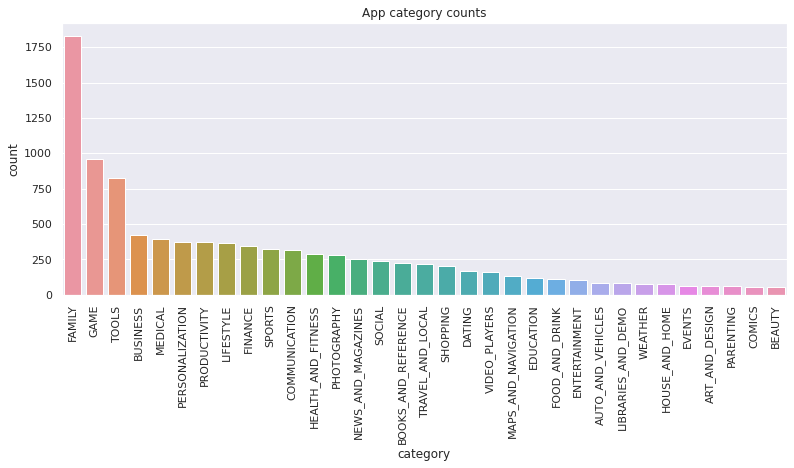

In [212]:
plt.subplots(figsize=(13,5))
sns.countplot(x='category', data=df, order = df['category'].value_counts().index)
plt.xticks(rotation=90);
plt.title('App category counts');

The most popular categories are famoly, fames and tools

### Is there any difference between the category column and genres?

In [213]:
df[['category','genres']]

,category,genres
0,ART_AND_DESIGN,Art & Design
1,ART_AND_DESIGN,Art & Design;Pretend Play
2,ART_AND_DESIGN,Art & Design
3,ART_AND_DESIGN,Art & Design
4,ART_AND_DESIGN,Art & Design;Creativity
...,...,...
9654,FAMILY,Education
9655,FAMILY,Education
9656,MEDICAL,Medical
9657,BOOKS_AND_REFERENCE,Books & Reference


It looks like they are slightly different

## App type (free or paid)

Text(0.5, 1.0, 'Paid vs Free apps')

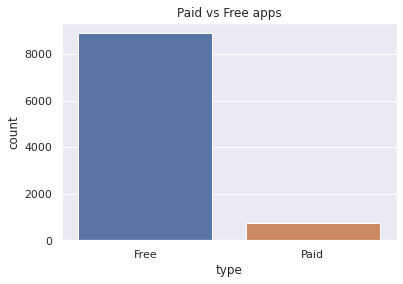

In [214]:
sns.countplot(x='type', data=df)
plt.title('Paid vs Free apps')

Most of the apps are free, as we saw during the price column analysis

## Content rating

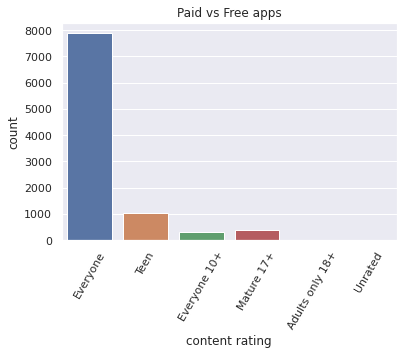

In [215]:
sns.countplot(x='content rating', data=df)
plt.title('Paid vs Free apps')
plt.xticks(rotation=60);

Most of the apps are for everyone

Text(0.5, 1.0, 'Content rating vs rating')

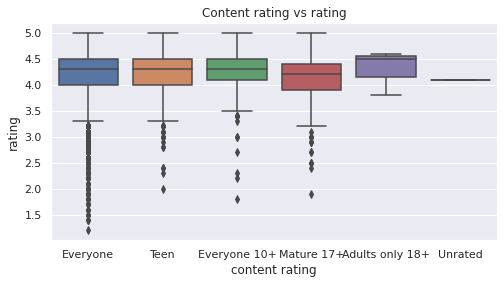

In [216]:
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.boxplot(x='content rating', y='rating', data=df)
ax.set_title('Content rating vs rating')

'Adults only 18+' apps are more dense around 4-4.5 rating, whereas other apps have a higher variance, outliers and have at least some apps with rating=5

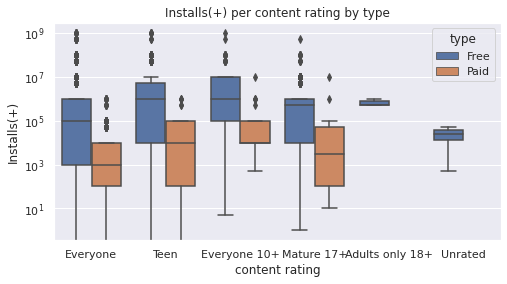

In [217]:
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.boxplot(x='content rating', y='Installs(+)', hue='type', data=df)
ax.set_title('Installs(+) per content rating by type')
ax.set_yscale('log')

From this plot we can see that free apps have more installs compared to paid apps and that apps for Everyone10+ have more installs.

## App Genres

In [218]:
df['genres'].value_counts()

Tools                              823
Entertainment                      561
Education                          507
Business                           419
Medical                            392
                                  ... 
Art & Design;Pretend Play            1
Lifestyle;Pretend Play               1
Comics;Creativity                    1
Art & Design;Action & Adventure      1
Strategy;Creativity                  1
Name: genres, Length: 118, dtype: int64

It looks like there are some apps with multiple genres as well.

Text(0.5, 1.0, 'Correlation Matrix')

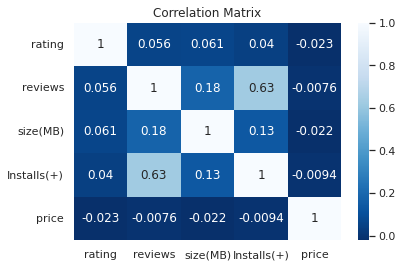

In [219]:
sns.heatmap(df.corr(), annot=True, cmap='Blues_r')
plt.title('Correlation Matrix')

There is a quite high positive correlation between installs and reviews. This means that apps with higher reviews have more installs.

## Last updated

In [220]:
df['last updated']=pd.to_datetime(df['last updated'])
df_clean['last updated']=pd.to_datetime(df_clean['last updated'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


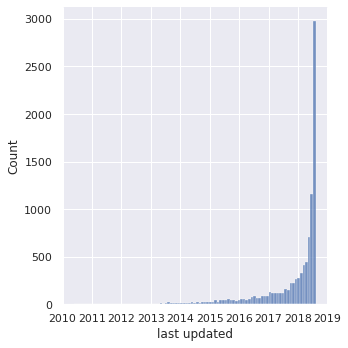

In [221]:
sns.displot(x='last updated', data=df)

Most apps have been recently updated recently (wrt dataset publication). There are also apps that have been last updated before 2014.<br>
Moreover, we extract the year from this feature, since it could be interesting to analyze.

In [222]:
df['last_up_year']=df['last updated'].dt.year

In [223]:
df_clean['last_up_year']=df_clean['last updated'].dt.year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Current version

In [224]:
df['current ver']

0                    1.0.0
1                    2.0.0
2                    1.2.4
3       Varies with device
4                      1.1
               ...        
9654                  1.48
9655                   1.0
9656                   1.0
9657    Varies with device
9658    Varies with device
Name: current ver, Length: 9643, dtype: object

In [225]:
df['current ver'] = df['current ver'].replace('Varies with device', 'NaN', regex=True)

In [226]:
df_clean['current ver'] = df_clean['current ver'].replace('Varies with device', 'NaN', regex=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [227]:
df['current ver'].value_counts()

NaN          1055
1.0           795
1.1           260
1.2           176
2.0           149
             ... 
1.6.11          1
20180517        1
3.1.00          1
2.1.54          1
2.0.148.0       1
Name: current ver, Length: 2814, dtype: int64

There are a lot of possible current versions among the apps in the store.<br>
To simplify the further analysis, we will approximate the current version with just the first number of the version.

In [228]:
df['current vers']=df['current ver'].str.extract(r'^(\d+).', ).astype(float)

In [229]:
df_clean['current vers']=df_clean['current ver'].str.extract(r'^(\d+).', ).astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
df['current vers'].value_counts()

1.0         4215
2.0         1393
3.0          816
4.0          542
5.0          351
            ... 
100900.0       1
190000.0       1
1805.0         1
263.0          1
41.0           1
Name: current vers, Length: 91, dtype: int64

It looks like some apps have very high numbers as the version first number... this sounds weird, probably the authors did this a joke.

<AxesSubplot:xlabel='current vers'>

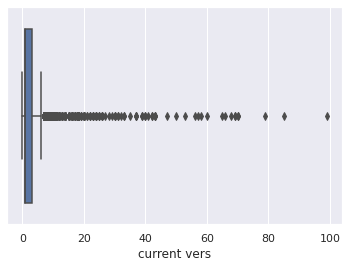

In [231]:
sns.boxplot(x='current vers', data=df.loc[df['current vers']<100])

We can see that by considering only apps with a version number lower than 100, we already have lots of outliers.

<AxesSubplot:xlabel='current vers'>

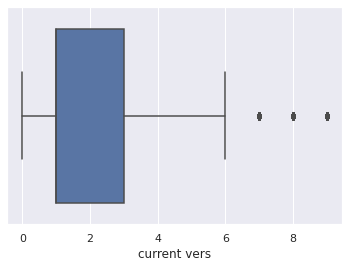

In [232]:
sns.boxplot(x='current vers', data=df.loc[df['current vers']<10])

By considering only apps with version lower than 10 we can start understanding the version feature distribution

In [233]:
print('Total apps', len(df))
print('Number of apps with current version lower than 1000:', len(df.loc[df['current vers']<1000]))
print('Number of apps with current version lower than 100:', len(df.loc[df['current vers']<100]))
print('Number of apps with current version lower than 10:', len(df.loc[df['current vers']<10]))
print('Number of apps with current version lower than 6:', len(df.loc[df['current vers']<6]))

Total apps 9643
Number of apps with current version lower than 1000: 8299
Number of apps with current version lower than 100: 8291
Number of apps with current version lower than 10: 8018
Number of apps with current version lower than 6: 7474


According to the boxplot, we could consider apps with a version higher than 6 as outliers.

We drop the categorical 'current ver' column, and we consider only apps with a current version lower than 6.

In [234]:
df=df.drop('current ver', axis=1)

In [235]:
df_clean=df_clean.drop('current ver', axis=1)

In [236]:
df=df.loc[df['current vers']<6]

In [237]:
df_clean=df_clean.loc[df_clean['current vers']<6]

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7474 entries, 0 to 9656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             7474 non-null   object        
 1   category        7474 non-null   object        
 2   rating          6216 non-null   float64       
 3   reviews         7474 non-null   int64         
 4   size(MB)        7301 non-null   float64       
 5   Installs(+)     7474 non-null   float64       
 6   type            7474 non-null   object        
 7   price           7474 non-null   float64       
 8   content rating  7474 non-null   object        
 9   genres          7474 non-null   object        
 10  last updated    7474 non-null   datetime64[ns]
 11  android ver     7472 non-null   object        
 12  last_up_year    7474 non-null   int64         
 13  current vers    7474 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
me

In [239]:
df.head()

,app,category,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last updated,android ver,last_up_year,current vers
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,4.0.3 and up,2018,1.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up,2018,2.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,4.0.3 and up,2018,1.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up,2018,1.0
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017-03-26,2.3 and up,2017,1.0


## Android version

In [240]:
df['android ver']

0       4.0.3 and up
1       4.0.3 and up
2       4.0.3 and up
4         4.4 and up
5         2.3 and up
            ...     
9652      4.1 and up
9653      4.0 and up
9654      4.1 and up
9655      4.1 and up
9656      2.2 and up
Name: android ver, Length: 7474, dtype: object

We will remove 'and up' from every rows.

In [241]:
df['android vers']=df['android ver'].replace('and up', '', regex=True)

In [242]:
df_clean['android vers']=df_clean['android ver'].replace('and up', '', regex=True)

In [243]:
df['android vers'].value_counts()

4.1                   1923
4.0.3                 1136
4.0                   1124
4.4                    683
2.3                    567
5.0                    389
4.2                    305
2.3.3                  250
2.2                    218
3.0                    215
4.3                    184
2.1                    124
1.6                     94
6.0                     45
Varies with device      42
7.0                     37
3.2                     31
2.0                     26
5.1                     20
1.5                     18
4.4W                    10
3.1                      9
2.0.1                    7
8.0                      5
7.1                      2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
Name: android vers, dtype: int64

We can see that we still need to do some cleaning on this column.
In particular we will remove 'varies with device', the 'w' which appears in 4.4w and remove the few data where the android version compatible is within a range such as '5.0 - 7.1.1 '.

In [244]:
df['android vers']=df['android vers'].replace('Varies with device', '', regex=True).replace('W', '', regex=True).replace('', np.nan)
df=df.loc[df['android vers'].str.contains(r'-') == False]

In [245]:
df_clean['android vers']=df_clean['android vers'].replace('Varies with device', '', regex=True).replace('W', '', regex=True).replace('', np.nan)
df_clean=df_clean.loc[df_clean['android vers'].str.contains(r'-') == False]

In [246]:
df['android vers']=df['android vers'].str.strip()

In [247]:
df_clean['android vers']=df_clean['android vers'].str.strip()

In [248]:
df['android vers'].value_counts()

4.1      1923
4.0.3    1136
4.0      1124
4.4       693
2.3       567
5.0       389
4.2       305
2.3.3     250
2.2       218
3.0       215
4.3       184
2.1       124
1.6        94
6.0        45
7.0        37
3.2        31
2.0        26
5.1        20
1.5        18
3.1         9
2.0.1       7
8.0         5
7.1         2
1.0         2
Name: android vers, dtype: int64

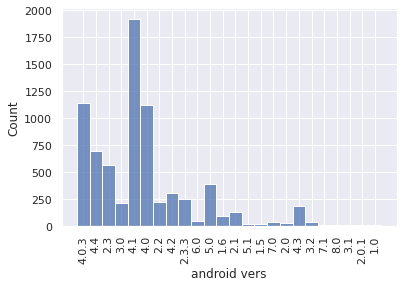

In [249]:
sns.histplot(x='android vers', data=df)
plt.xticks(rotation=90);

We can see that most apps works on Android 4.1, 4.0 and 4.0.3.

In [250]:
df['android vers']=df['android vers'].str.extract(r'^(\d+).', ).astype(float)

In [251]:
df_clean['android vers']=df_clean['android vers'].str.extract(r'^(\d+).', ).astype(float)

In [252]:
df['android vers'].value_counts()

4.0    5365
2.0    1192
5.0     409
3.0     255
1.0     114
6.0      45
7.0      39
8.0       5
Name: android vers, dtype: int64

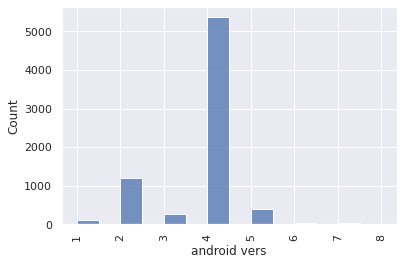

In [253]:
sns.histplot(x='android vers', data=df)
plt.xticks(rotation=90);

In [254]:
df_clean=df_clean.loc[(df_clean['android vers'] == 4.0) | (df_clean['android vers'] == 2.0)]

In [255]:
df=df.drop('android ver', axis=1)

In [256]:
df_clean=df_clean.drop('android ver', axis=1)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 9656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             7424 non-null   object        
 1   category        7424 non-null   object        
 2   rating          6170 non-null   float64       
 3   reviews         7424 non-null   int64         
 4   size(MB)        7282 non-null   float64       
 5   Installs(+)     7424 non-null   float64       
 6   type            7424 non-null   object        
 7   price           7424 non-null   float64       
 8   content rating  7424 non-null   object        
 9   genres          7424 non-null   object        
 10  last updated    7424 non-null   datetime64[ns]
 11  last_up_year    7424 non-null   int64         
 12  current vers    7424 non-null   float64       
 13  android vers    7424 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
me

Now the dataset looks more clean.

In [258]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6526 entries, 0 to 9656
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             6526 non-null   object        
 1   category        6526 non-null   object        
 2   rating          5407 non-null   float64       
 3   reviews         6526 non-null   int64         
 4   size(MB)        6397 non-null   float64       
 5   Installs(+)     6526 non-null   float64       
 6   type            6526 non-null   object        
 7   price           6526 non-null   float64       
 8   content rating  6526 non-null   object        
 9   genres          6526 non-null   object        
 10  last updated    6526 non-null   datetime64[ns]
 11  last_up_year    6526 non-null   int64         
 12  current vers    6526 non-null   float64       
 13  android vers    6526 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
me

In [259]:
df_clean = df_clean.dropna()

In [260]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 9655
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             5288 non-null   object        
 1   category        5288 non-null   object        
 2   rating          5288 non-null   float64       
 3   reviews         5288 non-null   int64         
 4   size(MB)        5288 non-null   float64       
 5   Installs(+)     5288 non-null   float64       
 6   type            5288 non-null   object        
 7   price           5288 non-null   float64       
 8   content rating  5288 non-null   object        
 9   genres          5288 non-null   object        
 10  last updated    5288 non-null   datetime64[ns]
 11  last_up_year    5288 non-null   int64         
 12  current vers    5288 non-null   float64       
 13  android vers    5288 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
me

# Exploratory Data Analysis

## Do expensive apps have higher rating?

<AxesSubplot:xlabel='price', ylabel='rating'>

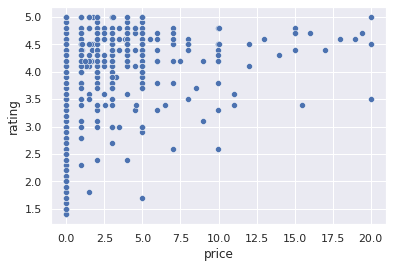

In [261]:
sns.scatterplot(x='price', y='rating', data=df_clean)

From this plot we can see that there no clear positive trend between price and rating. In particular, apps with a price higher than 20 have a rating than 3.0

## Do apps with high rating have more reviews?

<AxesSubplot:xlabel='rating', ylabel='reviews'>

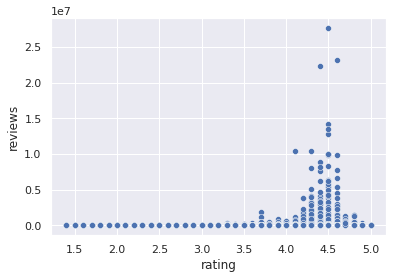

In [262]:
sns.scatterplot(x='rating', y='reviews', data=df_clean)

We can see that the majority of apps with high reviews have a rating between 4.0 and 5.0, with a clear peaks around 4.5

## Which category has more reviews?

Text(0.5, 1.0, 'reviews vs category')

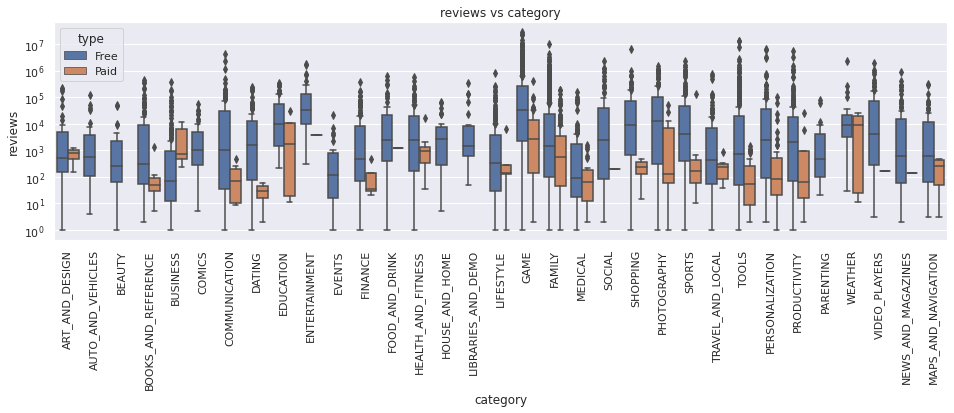

In [263]:
plt.figure(figsize=(16,4))
sns.boxplot(x='category', y='reviews', data=df_clean, hue='type')
plt.yscale('log')
plt.xticks(rotation=90);
plt.title('reviews vs category')

We can see that apps with the category game, entertainment, education and photography have more reviews than apps of other categories.<br>
In particular, free apps seems to have more reviews than paid apps for most categories, with the exception of business and weather, there paid apps have more reviews overall.

## Which category has higher rating?

Text(0.5, 1.0, 'rating vs category')

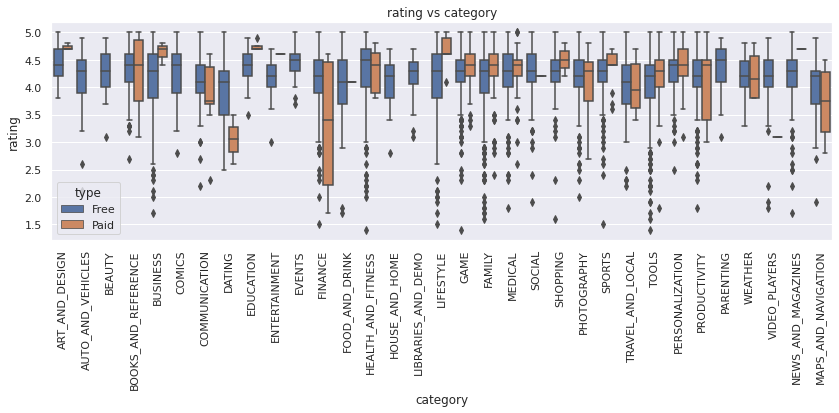

In [264]:
plt.figure(figsize=(14,4))
sns.boxplot(x='category', y='rating', data=df_clean, hue='type')
plt.xticks(rotation=90);
plt.title('rating vs category')

From this plot we can see that in almost every category, paid apps have higher rating than free apps. In particular it is also interesint to notice that free apps have lots of outlier values compared to paid apps.

## Is there any relationship between the category and app size?

Text(0.5, 1.0, 'size vs category')

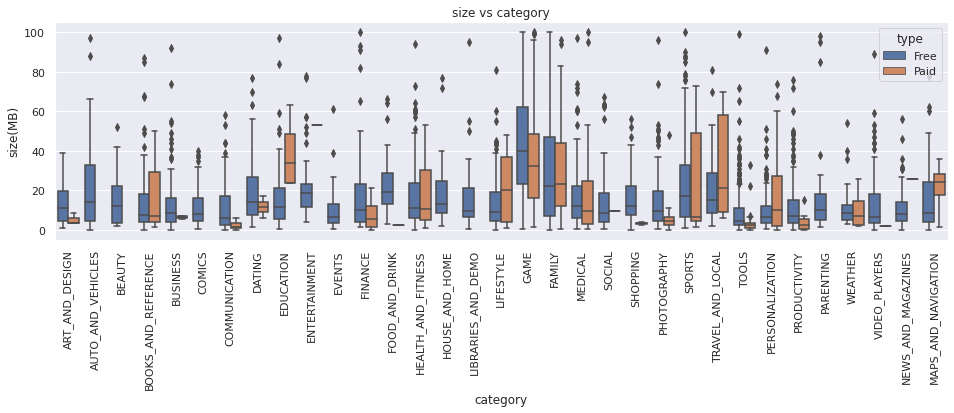

In [265]:
plt.figure(figsize=(16,4))
sns.boxplot(x='category', y='size(MB)', data=df_clean, hue='type')
plt.xticks(rotation=90);
plt.title('size vs category')

We can see that the category where apps have a higher size are 'game', 'travel and local' (for paid apps only), education (for paid apps only) and family.<br>
In particular, free apps seems to have a higher size compared to paid apps for almost all categories.

## Is there any relationship between app rating and size?

<AxesSubplot:xlabel='rating', ylabel='size(MB)'>

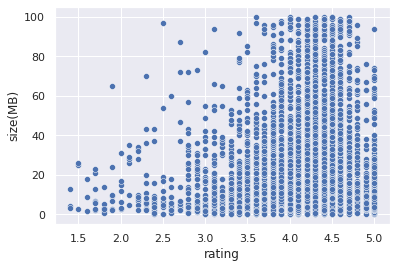

In [266]:
sns.scatterplot(x='rating', y='size(MB)', data=df_clean)

We can see that apps with higher ratings have more possible sizes compared to apps with lower ratings (<3.0), where the size is almost always under 40 MB. 

## Is there any relationship between Installs and Reviews?

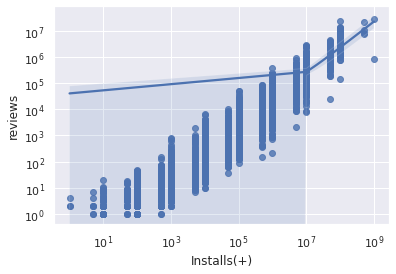

In [267]:
sns.regplot(x='Installs(+)',y='reviews', data=df_clean)
plt.yscale('log')
plt.xscale('log')

From this plot we can see that apps with more installs tends to have more reviews

# App rating prediction

In [268]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 9655
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app             5288 non-null   object        
 1   category        5288 non-null   object        
 2   rating          5288 non-null   float64       
 3   reviews         5288 non-null   int64         
 4   size(MB)        5288 non-null   float64       
 5   Installs(+)     5288 non-null   float64       
 6   type            5288 non-null   object        
 7   price           5288 non-null   float64       
 8   content rating  5288 non-null   object        
 9   genres          5288 non-null   object        
 10  last updated    5288 non-null   datetime64[ns]
 11  last_up_year    5288 non-null   int64         
 12  current vers    5288 non-null   float64       
 13  android vers    5288 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
me

Text(0.5, 1.0, 'Correlation Matrix')

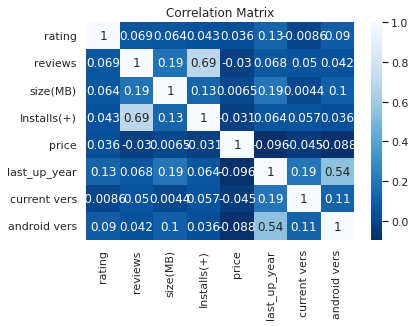

In [269]:
sns.heatmap(df_clean.corr(), cmap='Blues_r', annot=True)
plt.title('Correlation Matrix')

In [270]:
df1=df_clean.copy()

In [271]:
df1.category.nunique()

33

In [272]:
df1.genres.nunique()

107

Since Genres and Category are very similar, we decide to keep only 'genres' since it has more different values which include also those of 'category'/

In [273]:
df1=df1.drop(['app','category','last updated'], axis=1)

In [274]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5288 entries, 0 to 9655
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          5288 non-null   float64
 1   reviews         5288 non-null   int64  
 2   size(MB)        5288 non-null   float64
 3   Installs(+)     5288 non-null   float64
 4   type            5288 non-null   object 
 5   price           5288 non-null   float64
 6   content rating  5288 non-null   object 
 7   genres          5288 non-null   object 
 8   last_up_year    5288 non-null   int64  
 9   current vers    5288 non-null   float64
 10  android vers    5288 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 624.8+ KB


In [275]:
df1.head()

,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last_up_year,current vers,android vers
0,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018,1.0,4.0
1,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018,2.0,4.0
2,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018,1.0,4.0
4,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018,1.0,4.0
5,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,2017,1.0,2.0


To improve the ML algorithm prediction performance, we will log-transform the column 'Installs(+)', in order to make it more 'Normal'.

In [276]:
df1['Installs(+)']=np.log(df_clean['Installs(+)'])

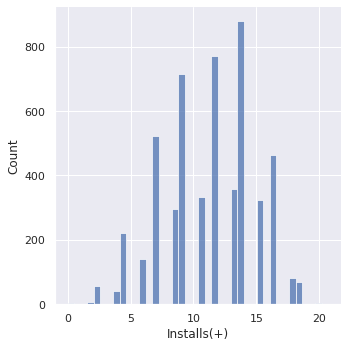

In [277]:
sns.displot(df1['Installs(+)'])

We can clearly see the benefit of the log transform, now it looks more like a normal distrbution.

In [278]:
df1=df1.replace('Free',0)
df1=df1.replace('Paid',1)

In [279]:
from sklearn.preprocessing import LabelEncoder

en = LabelEncoder()
catCols =  ['content rating','genres']
for cols in catCols:
    df1[cols] = en.fit_transform(df1[cols])

We can see that genres are more specific that category. We will drop category since the column genres has the same information.

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error

In [281]:
df1.head()

,rating,reviews,size(MB),Installs(+),type,price,content rating,genres,last_up_year,current vers,android vers
0,4.1,159,19.0,9.210340,0,0.0,1,9,2018,1.0,4.0
1,3.9,967,14.0,13.122363,0,0.0,1,11,2018,2.0,4.0
2,4.7,87510,8.7,15.424948,0,0.0,1,9,2018,1.0,4.0
4,4.3,967,2.8,11.512925,0,0.0,1,10,2018,1.0,4.0
5,4.4,167,5.6,10.819778,0,0.0,1,9,2017,1.0,2.0


In [282]:
X=df1.drop('rating', axis = 1).values

In [283]:
y=df1['rating'].values

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

In [285]:
scaler = MinMaxScaler()

In [286]:
scaler.fit(X_train)

MinMaxScaler()

In [287]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)            

In [288]:
from sklearn.ensemble import RandomForestRegressor

In [289]:
rf = RandomForestRegressor()

In [290]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [291]:
y_pred_rf = rf.predict(X_test)

In [292]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("RMSE using RF: ", np.sqrt(mse_rf))

RMSE using RF:  0.5107842241511951


In [293]:
feature_name_list=df1.drop('rating', axis = 1).columns

In [294]:
rf.feature_names = feature_name_list

Text(0.5, 0, 'Feature Importance (%)')

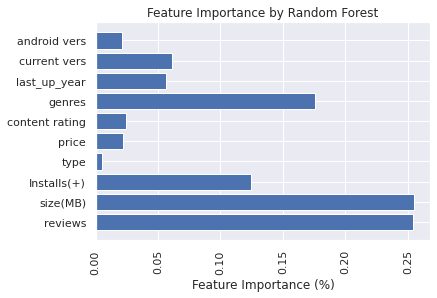

In [295]:
plt.barh(rf.feature_names,rf.feature_importances_)
plt.xticks(rotation=90);
plt.title('Feature Importance by Random Forest')
plt.xlabel('Feature Importance (%)')

## XGBoost

In [296]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train) 
y_pred_xgb = xgb.predict(X_test) 
mse_xgb = mean_squared_error(y_pred_xgb, y_test)
print("RMSE:" , np.sqrt(mse_xgb)) 

RMSE: 0.5105837428762217


# Rating prediction Summary

In [297]:
xgb.feature_names = feature_name_list

In [298]:
print("RMSE using RF: ", np.sqrt(mse_rf))
print("RMSE using XGBoost: ", np.sqrt(mse_xgb))

RMSE using RF:  0.5107842241511951
RMSE using XGBoost:  0.5105837428762217


Text(0.5, 0, 'Feature Importance (%)')

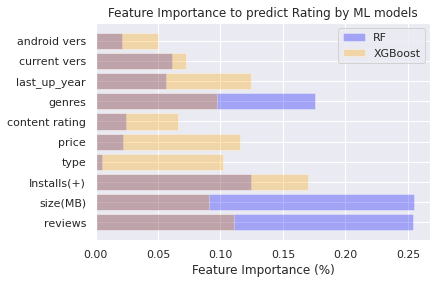

In [299]:
plt.barh(rf.feature_names,rf.feature_importances_, alpha=0.3, label='RF', color='blue')
plt.barh(xgb.feature_names,xgb.feature_importances_, alpha=0.3, label='XGBoost', color='orange')
plt.legend(loc='upper right');
plt.title('Feature Importance to predict Rating by ML models')
plt.xlabel('Feature Importance (%)')

We can see that RF and XGBoost gave similar results in terms of RMSE.<br>
For what concerns the Feature importance, we can see that RF gave more importance to reviews, size and genres, while XGBoost spreaded more the feature importance among all the features.